#### [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 45

**Author 1 (sciper):** Elias William (367106)  
**Author 2 (sciper):** Erik Kvikne (360962)   
**Author 3 (sciper):** Sami Laubo (360965) 

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [30]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, '../data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

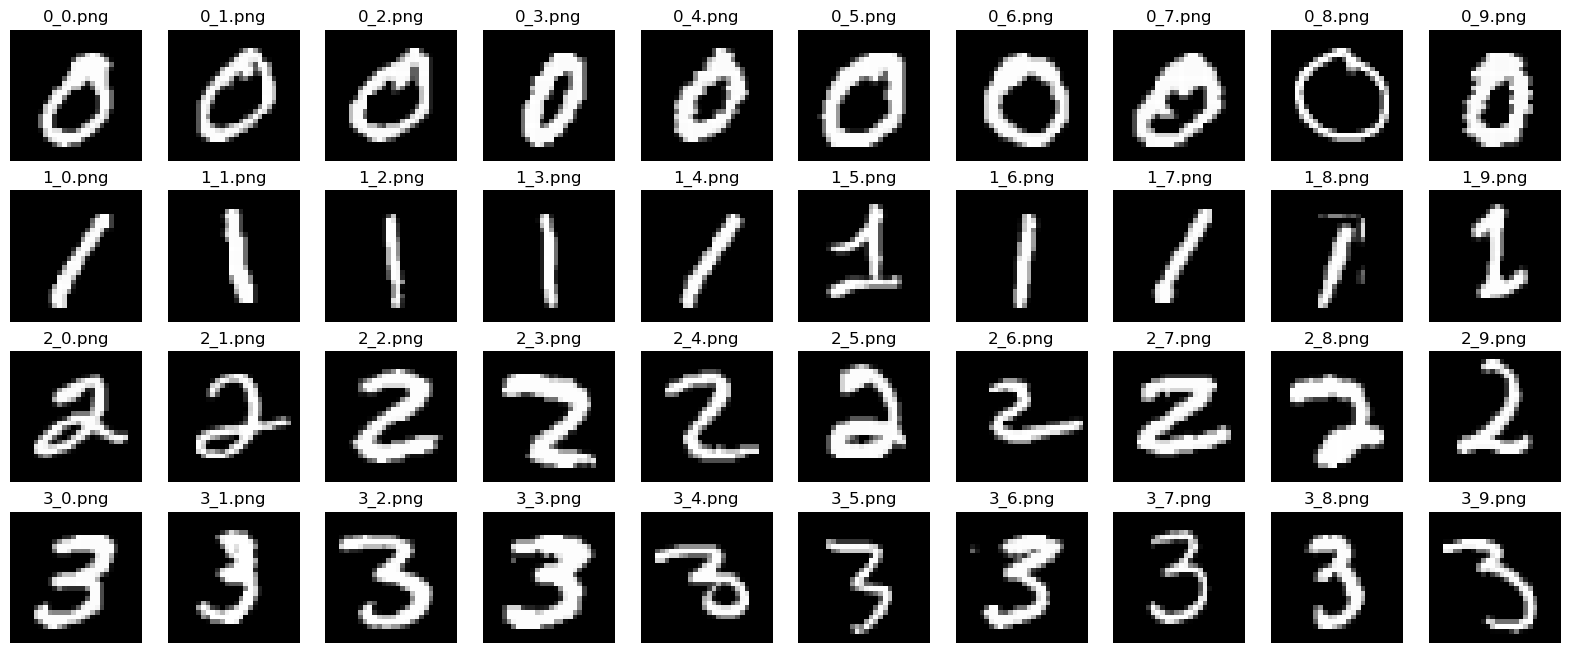

In [31]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

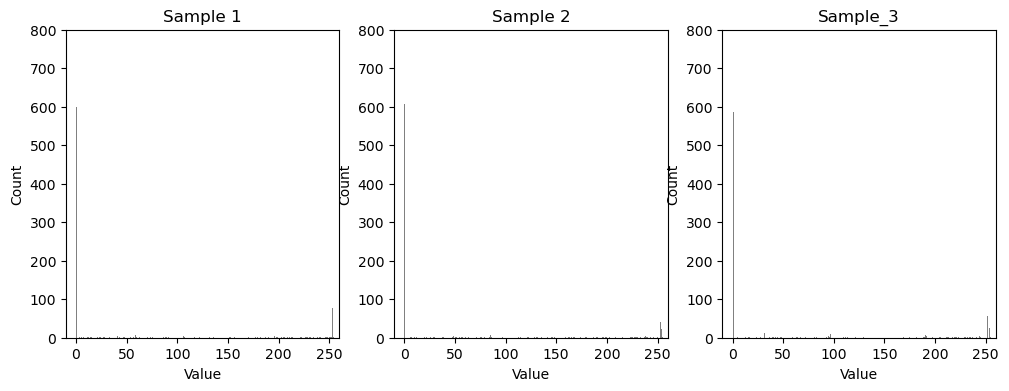

In [32]:
# TODO
# Histograms
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ['Sample 1', 'Sample 2', 'Sample_3']

for idx, (image, ax, title) in enumerate(zip(zeros_im[:3], axes[:3], titles)):
    ax.hist(image.ravel(), bins=255, color='gray')
    ax.set_title(title)
    ax.set_xlim((-10, 260))
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    ax.set_ylim([0,800])
    
plt.tight_layout

In [33]:
import numpy as np
import cv2
from skimage.morphology import remove_small_objects

# Function to process images
def process_image(img, kernel_mid=5., thr=150):
    img_pr = img.copy()
    
    # Sharpening filter - High pass
    kernel = np.array([[0.0,        -1.0,  0.0], 
                       [-1.0, kernel_mid, -1.0],
                       [0.0,        -1.0,  0.0]])
    img_pr = cv2.filter2D(img_pr, -1, kernel)

    # Threshold and segment
    img_pr[img_pr<thr] = 0
    img_pr = img_pr.astype(bool)

    # Filter small objects away
    img_pr = remove_small_objects(img_pr, 10)

    return img_pr

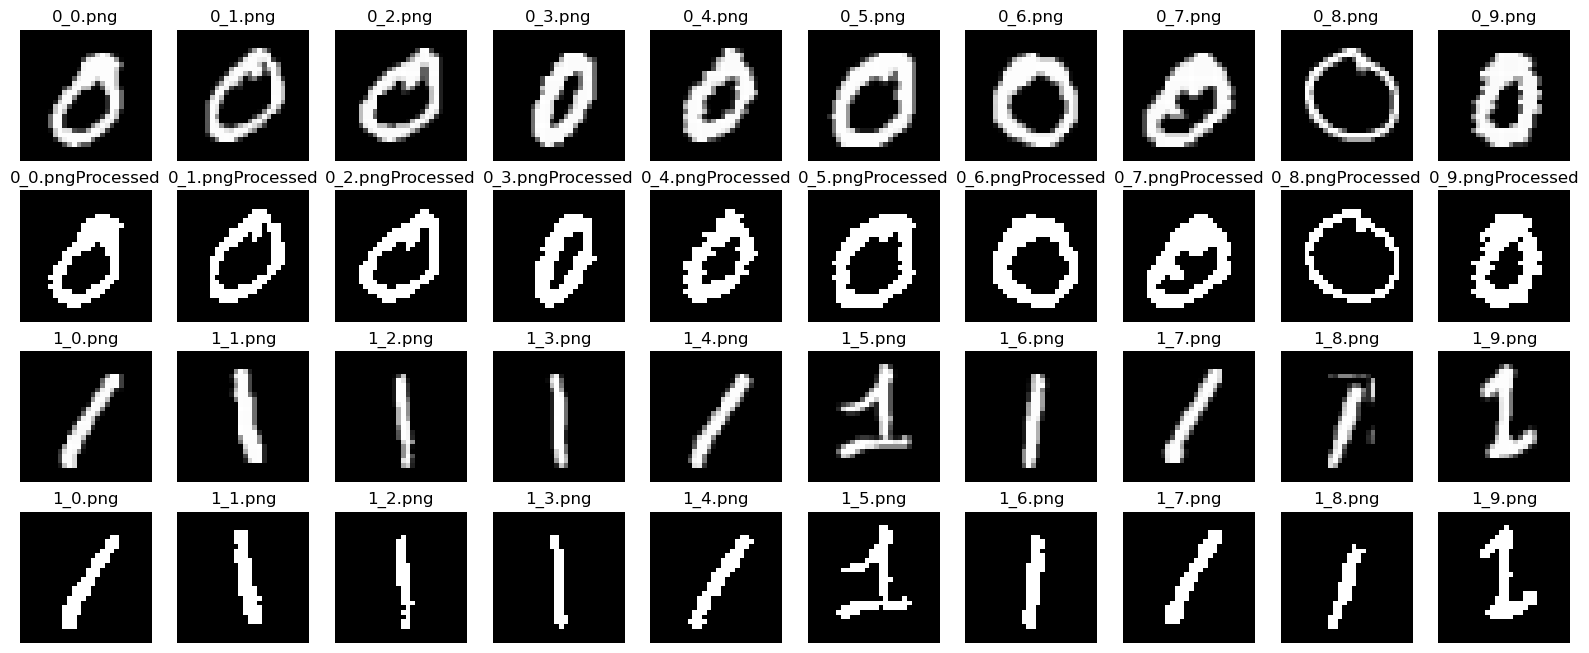

In [34]:
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))

    
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], zeros_im, zeros_names):
    im_processed = process_image(im)

    ax.imshow(im_processed, cmap='gray')
    ax.axis('off')
    ax.set_title(nm + 'Processed')

for ax, im, nm in zip(axes[2], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[3], ones_im, ones_names):
    im_processed = process_image(im)

    ax.imshow(im_processed, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

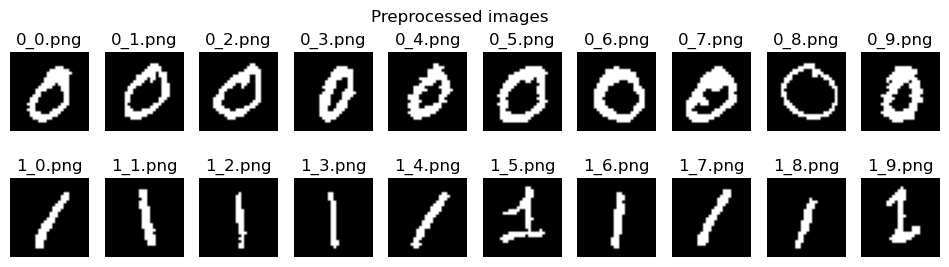

In [35]:
# TODO: Fill the lists below with your preprocessed images of "0"s and "1"s  
zeros = [process_image(im) for im in zeros_im]
ones = [process_image(im) for im in ones_im]

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

What worked was the high-filter to sharpen the edges of the images. The problem with this technique was that the artifacts in the image (for example 1_8) also gets sharpened. We tried different techniques to remove these artifacts. One thing we tried was low-pass filter the images but this made the contour of the object very smoothed and blurry. We also tried morphology techniques on the thresholded images, like opening, remove small objects and erosion. We found that remove small objects worked good to remove the artifacts.

### 1.2. Get descriptors (4 pts)

In [36]:
# Function to make equi-distant points along a contour
# Modified version of code from: https://stackoverflow.com/questions/18244305/how-to-redistribute-points-evenly-over-a-curve
def interpcurve(N_interp, points):
    # Equally spaced in arclength
    N = np.transpose(np.linspace(0, 1, N_interp))

    # Number of points on the curve
    n = points.shape[0]
    
    p1 = points[0,:]
    pend = points[-1,:]
    last_segment = np.linalg.norm(np.subtract(p1, pend))
    epsilon = 10*np.finfo(float).eps

    # If the two end points are not close enough lets close the curve
    if last_segment > epsilon*np.linalg.norm(np.amax(abs(points), axis=0)):
        points = np.vstack((points, p1))
        N_interp = N_interp + 1

    pt = np.zeros((N_interp, 2))

    # Compute the chordal arclength of each segment.
    chordlen = (np.sum(np.diff(points,axis=0)**2, axis=1))**(1/2)
    # Normalize the arclengths to a unit total
    chordlen = chordlen/np.sum(chordlen)
    # Cumulative arclength
    cumarc = np.append(0,np.cumsum(chordlen))

    tbins = np.digitize(N, cumarc) # bin index in which each N is in

    # Catch any problems at the ends
    tbins[np.where(tbins<=0 | (N<=0))] = 1
    tbins[np.where(tbins >= n | (N >= 1))] = n - 1      

    s = np.divide((N - cumarc[tbins]), chordlen[tbins-1]) 
    pt = points[tbins,:] + np.multiply((points[tbins,:] - points[tbins-1,:]), (np.vstack([s]*2)).T)

    return pt 

In [90]:
# Function that takes as input an image and returns a set of descriptors. 
# You may use other custom helper functions to break the code into useful chuncks.

# TODO

from skimage.measure import find_contours
import scipy
import math

def get_descriptors(img):    
    # Find the contours of the objects
    img_contours = find_contours(img)
    
    # Save the longest contour for each image
    img_long_contour = max(img_contours, key=len)

    # Make points equi-distant
    img_contour_interp = interpcurve(150, img_long_contour)

    # Create complex points and take the fourier transform
    complex_points = np.array(img_contour_interp[:,0] + img_contour_interp[:,1]*1j)

    descriptors = np.fft.fft(complex_points)

    return descriptors

# Check first 10 descriptors of a test image (just to check that your pipeline works well)
print(get_descriptors(zeros[0])[:10])

[ 2.22493142e+03+2.08470199e+03j  1.66987064e+02-2.32972622e+02j
 -5.39519751e+01+3.39511061e+01j  1.87679366e+00-5.62113582e+00j
  2.89472623e+01-1.62074564e+01j  3.82486377e+00+1.46891322e+01j
 -3.08168823e+00-6.10983314e+00j  3.67323400e+00-1.73209876e+00j
  1.19095383e+00+2.76109325e+00j  8.12866233e+00-1.05118817e+01j]


#### Discussion

The reason for having fourier descriptors is to describe the object in a more general way. For example the fourier descriptors are invariant to translation (except fo the first point), the rotation only affects the phase and in the same amount for all phases. Scaling do not affects the ratio between two frequencies. This makes the description easily comparable with other contours. You can also choose in the reconstruction how much smoothing of the contour you would like. To have equally many points, by zeropadding before dft, for each contour. The spacing in the fourier domain is also the same for all contours. This makes it easier to compare.

TODO

### 1.3. Study effect of descriptors (6 pts)

In [38]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros[0]
one = ones[0]

In [39]:
# TODO
def reconstruct_contour(descriptors_in, set_size):
    descriptors = descriptors_in.copy()

    # Reduce the amount of frequencies used for reconstruction
    descriptors[ set_size + 1 : descriptors.shape[0]//2 + 1 ] = 0
    descriptors[ descriptors.shape[0]//2 + 1 : - set_size] = 0

    # Reconstruct
    reconstr = np.fft.ifft(descriptors)

    reconstr_xy = np.array((np.real(reconstr), np.imag(reconstr))).T

    return reconstr_xy

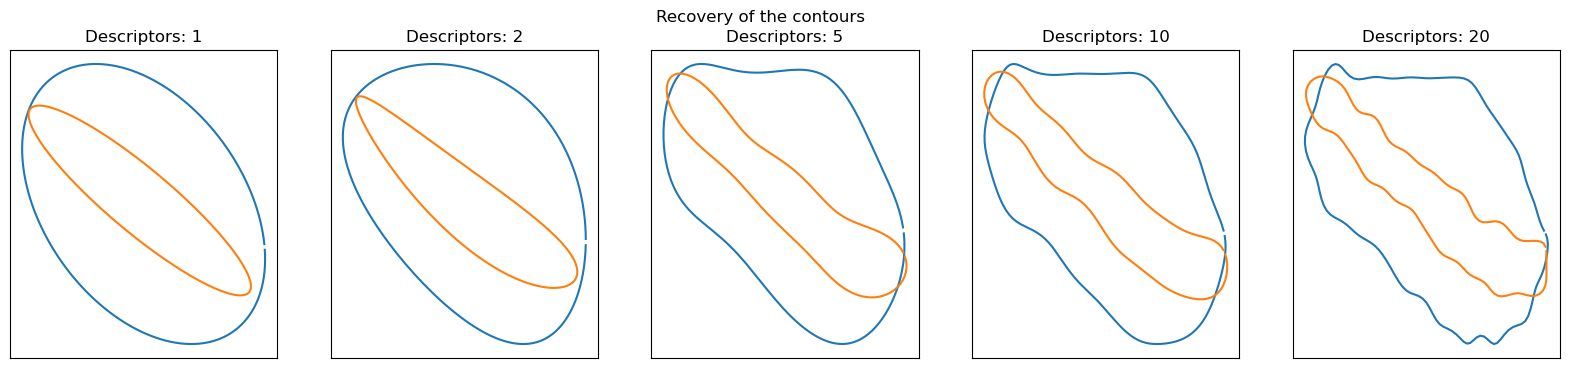

In [91]:
# Get descriptors
desc_zero = get_descriptors(zero)
desc_one = get_descriptors(one)

# Reconstruct all contours
rec_zero_list = [reconstruct_contour(desc_zero, set_size) for set_size in descr_set_sizes]
rec_one_list = [reconstruct_contour(desc_one, set_size) for set_size in descr_set_sizes]

# On each of the 5 plots you will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot recovery for a zero image
for i in range(0,  5):
    axes[i].plot(rec_zero_list[i][:,0], rec_zero_list[i][:,1])

    axes[i].set_title(f'Descriptors: {descr_set_sizes[i]}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

# Plot recovery for a one image
for i in range(0,  5):
    axes[i].plot(rec_one_list[i][:,0], rec_one_list[i][:,1])# TODO

fig.suptitle("Recovery of the contours")
plt.show()

#### Discussion

By reconstructing the contour shapes with less descriptors the contour is smoothed out. One way to think of it is that by removing higher frequencies of descriptors, you basically perform low pass filtering on the contour. So the smoothing is a logical result. The reconstructions with less frequencies used still keep the general shape of the contour. This means that we still can use it for object classification.

### 1.4 Clustering (2 pts)

In [41]:
# TODO

# Getting amplitude of descriptors 
zerosDescriptors = np.array([abs(get_descriptors(zero)) for zero in zeros])
onesDescriptors = np.array([abs(get_descriptors(one)) for one in ones])


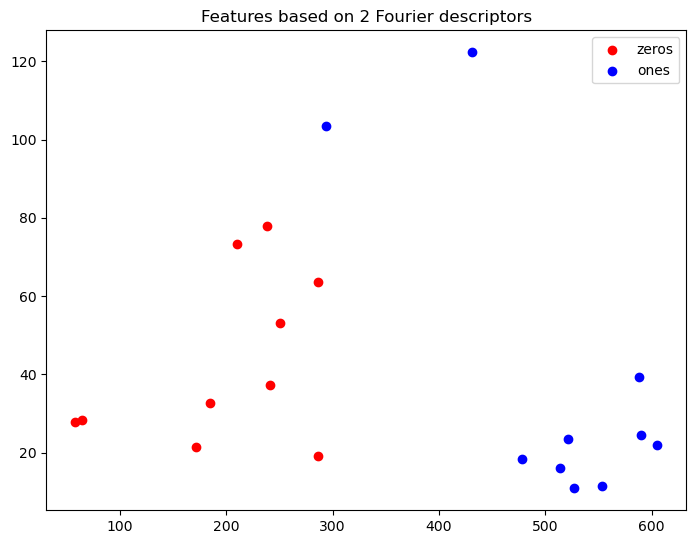

In [42]:
# TODO: You should fill the lists below, with your features

# First feature for all "0"s
zeros_f1 = zerosDescriptors[:,1] # Erik: The zeroth component is only a translation component, so we should thake the first and second descriptors, right?
# Second feature for all "0"s
zeros_f2 = zerosDescriptors[:,2]
# Fist feature for all "1"s
ones_f1 = onesDescriptors[:,1]
# Second feature for all "1"s
ones_f2 = onesDescriptors[:,2]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


In the plot we see that the ones and zero are can be separated relatively well by a curve. Our Fourier descriptors carry information about the contours of the zeros and ones. If we wanted to perfectly reconstruct that contour, we would need to include all descriptors. But a large part of the information in stored in just the two first descriptors. This information stored in these two descriptors allows us to distinguish the ones from the zeros.

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

Translation only effects the zeroth coefficient of our Fourier descriptors. Meaning that a operation that subtracts the appropriate amount from this component. To make it invariant we need to subtract the vector that the picture is translated by (represented as a complex number), multiplied with the number of points in our contour.

A rotation of our picture will change the phase of all of our Fourier descriptors by the same amount. To make our descriptors invariant rotation, we will multiply all of our descriptors with the appropriate phasefactor $e^{-i\theta}$. Note that this change of phase does not affect the amplitude of the descriptors, meaning that the amplitude of the descriptors are invariant of rotation.

Changing the scale will lead to a multiplication between all descriptors by the same amount. By looking at the ratio between each descriptor and one descriptor of our choice, we will get descriptors that are invariant of scaling. In other words; we pick one descriptor and divide all of the descriptors by that amount.

#### Implementation

In [68]:
# TODO: Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.


def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):

    descriptors = get_descriptors(img) # Get all Fourier descriptors

    if inv_to_rotation: # Rotation
        descriptors = abs(descriptors) # Get the amplitude of descriptors
    
    if inv_to_scale: # Scale
        descriptors /= descriptors[0] # Divide all descriptors by first descriptor

    if inv_to_translation: # Translation
        descriptors = descriptors[1:] # Remove zeroth descriptor

    return descriptors

In [69]:
from scipy.ndimage import rotate

# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    # Rotates image random number of degrees
    img = rotate(img.astype(np.int8), angle=np.random.randint(0, 360), reshape=False).astype(bool)

    return img

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img, x, y):
    # Move all cells in matrix by x and y
    img_translated = np.roll(img, x, axis=0)
    img_translated = np.roll(img_translated, y, axis=1)
    return img_translated
    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img, k):
    # Scales image to k times the original size
    return np.kron(img, np.ones((k, k)))

In [88]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = [random_rotate(zero) for zero in zeros]
rotated_images_ones = [random_rotate(one) for one in ones]

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = [random_translate(zero,2,3) for zero in zeros]
translated_images_ones = [random_translate(one,2,3) for one in ones]

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = [random_scale(zero,3) for zero in zeros]
scaled_images_ones = [random_scale(one,3) for one in ones]

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = [random_scale(zero,3) for zero in [random_translate(zero,2,3) for zero in rotated_images_zeros]]
transformed_images_ones = [random_scale(one,3) for one in [random_translate(one,2,3) for one in rotated_images_ones]]

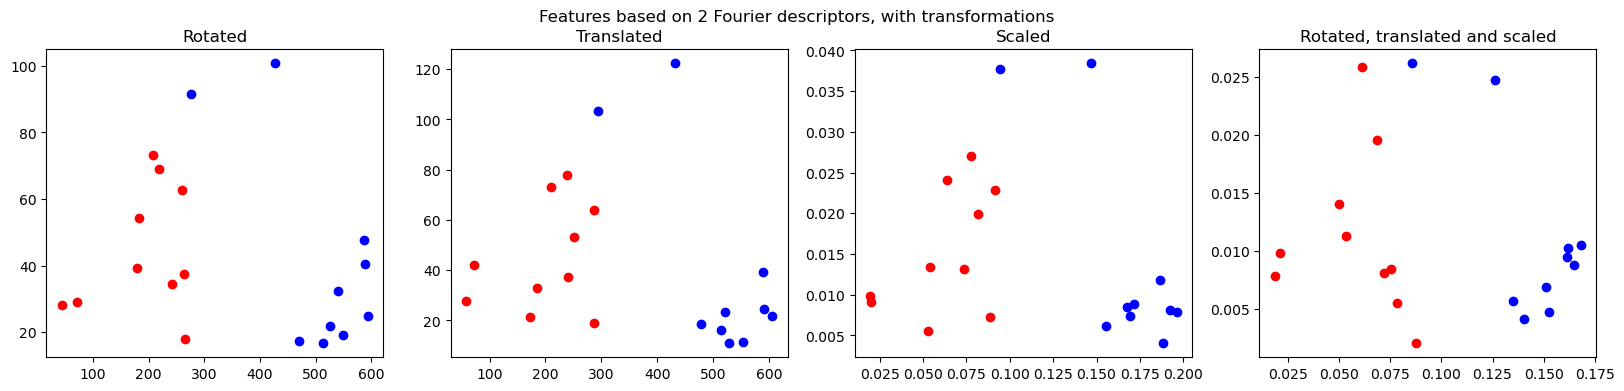

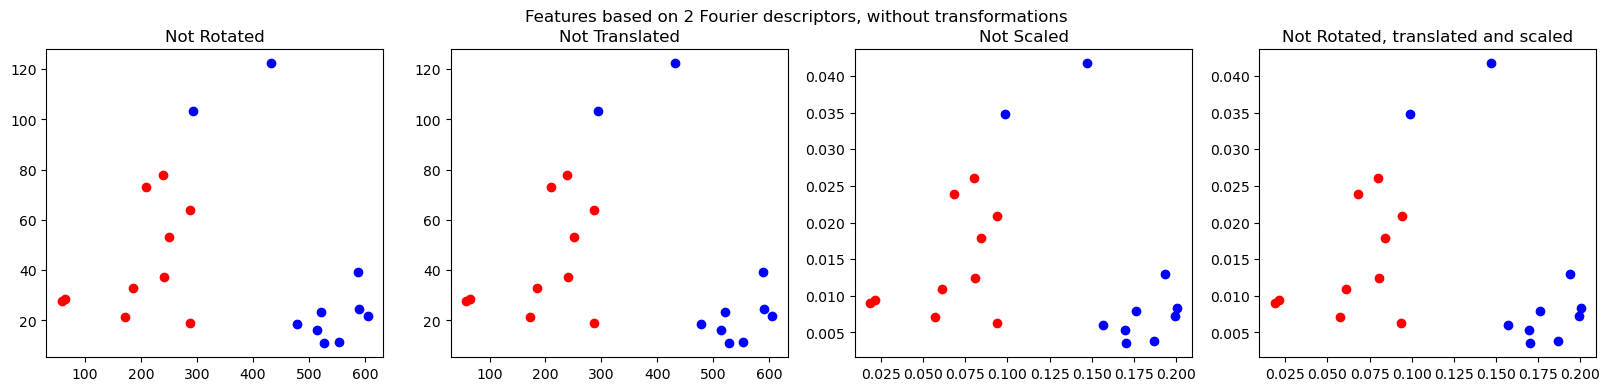

In [89]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!


# Plot the descriptors for the transformed images
fig, axes = plt.subplots(1, 4, figsize=(20, 4))


zeroRot = np.array([get_invariant_features(zero, inv_to_rotation = True) for zero in rotated_images_zeros])
oneRot = np.array([get_invariant_features(one, inv_to_rotation = True) for one in rotated_images_ones])

axes[0].scatter(abs(zeroRot[:,1]), abs(zeroRot[:,2]), color='r', label='zeros')
axes[0].scatter(abs(oneRot[:,1]), abs(oneRot[:,2]), color='b', label='ones')
axes[0].set_title('Rotated')

zeroTrans = np.array([get_invariant_features(zero, inv_to_translation = True) for zero in translated_images_zeros])
oneTrans = np.array([get_invariant_features(one, inv_to_translation = True) for one in translated_images_ones])

axes[1].scatter(abs(zeroTrans[:,0]), abs(zeroTrans[:,1]), color='r', label='zeros')
axes[1].scatter(abs(oneTrans[:,0]), abs(oneTrans[:,1]), color='b', label='ones')
axes[1].set_title('Translated')

zeroScale = np.array([get_invariant_features(zero, inv_to_scale = True) for zero in scaled_images_zeros])
oneScale = np.array([get_invariant_features(one, inv_to_scale = True) for one in scaled_images_ones])

axes[2].scatter(abs(zeroScale[:,1]), abs(zeroScale[:,2]), color='r', label='zeros')
axes[2].scatter(abs(oneScale[:,1]), abs(oneScale[:,2]), color='b', label='ones')
axes[2].set_title('Scaled')

zeroAll = np.array([get_invariant_features(zero, inv_to_translation = True, inv_to_scale = True, inv_to_rotation = True) for zero in transformed_images_zeros])
oneAll = np.array([get_invariant_features(one, inv_to_translation = True, inv_to_scale = True, inv_to_rotation = True) for one in transformed_images_ones])

axes[3].scatter(abs(zeroAll[:,0]), abs(zeroAll[:,1]), color='r', label='zeros')
axes[3].scatter(abs(oneAll[:,0]), abs(oneAll[:,1]), color='b', label='ones')
axes[3].set_title('Rotated, translated and scaled')


# Plot the descriptors of the original images
fig.suptitle("Features based on 2 Fourier descriptors, with transformations")

fig, axes = plt.subplots(1, 4, figsize=(20, 4))


zero_not_Rot = np.array([get_invariant_features(zero, inv_to_rotation = True) for zero in zeros])
one_not_Rot = np.array([get_invariant_features(one, inv_to_rotation = True) for one in ones])

axes[0].scatter(abs(zero_not_Rot[:,1]), abs(zero_not_Rot[:,2]), color='r', label='zeros')
axes[0].scatter(abs(one_not_Rot[:,1]), abs(one_not_Rot[:,2]), color='b', label='ones')
axes[0].set_title('Not Rotated')

zero_not_Trans = np.array([get_invariant_features(zero, inv_to_translation = True) for zero in zeros])
one_not_Trans = np.array([get_invariant_features(one, inv_to_translation = True) for one in ones])

axes[1].scatter(abs(zero_not_Trans[:,0]), abs(zero_not_Trans[:,1]), color='r', label='zeros')
axes[1].scatter(abs(one_not_Trans[:,0]), abs(one_not_Trans[:,1]), color='b', label='ones')
axes[1].set_title('Not Translated')

zero_not_Scale = np.array([get_invariant_features(zero, inv_to_scale = True) for zero in zeros])
one_not_Scale = np.array([get_invariant_features(one, inv_to_scale = True) for one in ones])

axes[2].scatter(abs(zero_not_Scale[:,1]), abs(zero_not_Scale[:,2]), color='r', label='zeros')
axes[2].scatter(abs(one_not_Scale[:,1]), abs(one_not_Scale[:,2]), color='b', label='ones')
axes[2].set_title('Not Scaled')

zero_not_All = np.array([get_invariant_features(zero, inv_to_translation = True, inv_to_scale = True, inv_to_rotation = True) for zero in zeros])
one_not_All = np.array([get_invariant_features(one, inv_to_translation = True, inv_to_scale = True, inv_to_rotation = True) for one in ones])

axes[3].scatter(abs(zero_not_All[:,0]), abs(zero_not_All[:,1]), color='r', label='zeros')
axes[3].scatter(abs(one_not_All[:,0]), abs(one_not_All[:,1]), color='b', label='ones')
axes[3].set_title('Not Rotated, translated and scaled')


fig.suptitle("Features based on 2 Fourier descriptors, without transformations")

plt.show()

#### Discussion

As predicted the above plots show that it is possible to get closely independent descriptors. In the figure above, the top row show the distribution of zeros and ones considering descriptor 1 and 2 after rotating, translating, scaling. Also the forth image shows when applying all the transformations to an image. The row below shows the distribution of the descriptors from the original, untransformed, images. One can see that there are some small differences, this could be that the images are very small and ex. rotation by 3 degrees would change the image slightly. However, the images prove that the descriptors are invariant to rotation, translation and scaling if one has in mind the distortions the transformations makes in the images.

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

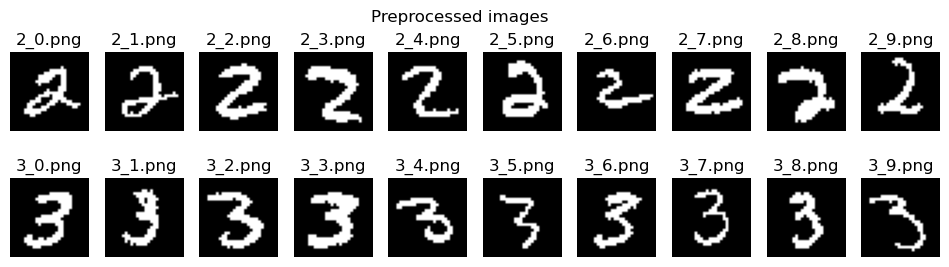

In [93]:
# TODO Preprocess
twos = [process_image(im) for im in twos_im]
threes = [process_image(im) for im in threes_im]

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

In [94]:
# Area and perimeter extraction
twos_area = np.array([np.sum(two) for two in twos])
threes_area = np.array([np.sum(three) for three in threes])

twos_contours = [max(find_contours(two), key=len) for two in twos]
twos_lengths = np.array([np.sum(np.sqrt(np.sum((two_contour[1:] - two_contour[:-1])**2, axis=1))) for two_contour in twos_contours])

threes_contours = [max(find_contours(three), key=len) for three in threes]
threes_lengths = np.array([np.sum(np.sqrt(np.sum((three_contour[1:] - three_contour[:-1])**2, axis=1))) for three_contour in threes_contours])

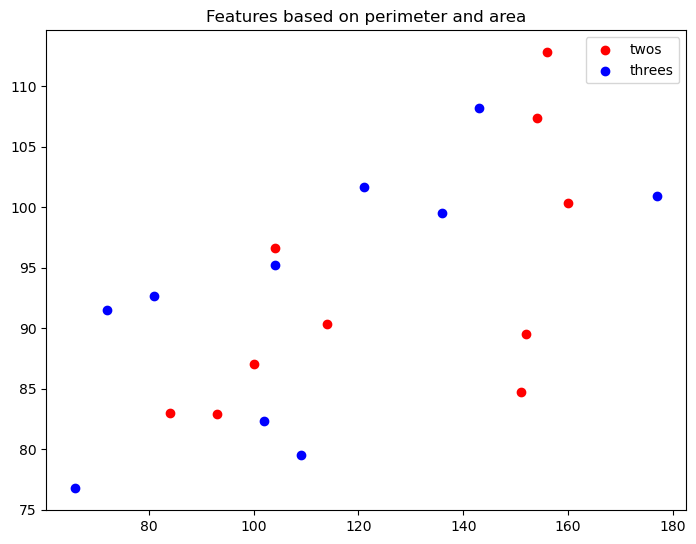

In [95]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = twos_area
twos_f2 = twos_lengths
threes_f1 = threes_area
threes_f2 = threes_lengths

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

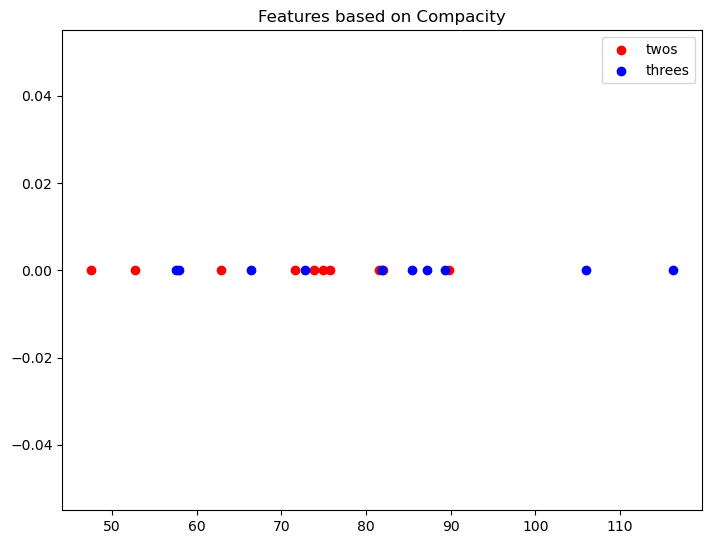

In [96]:
# TODO: Make the 1D plot of the compacity
twos_C = (twos_lengths**2)/twos_area
threes_C = (threes_lengths**2)/threes_area

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_C,[0]*len(twos_C), color='r', label='twos')
ax.scatter(threes_C,[0]*len(threes_C), color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on Compacity")
plt.show()


####  Discussion

The area and perimeter used as classification does not seem to work well for the twos and threes. There is no clear clusters that separates the images in feature space. This seems logical because if one looks at the images of twos and threes, the perimeter and area does not seem that different. This technique should work better if you have numbers that are less similar in area and perimeter. The compacity does not work either because it is a measurement based on the are and perimeter of an object.

### 2.2. Additional method (4 pts)

Text(0.5, 1.0, 'Features based on perimeter and area')

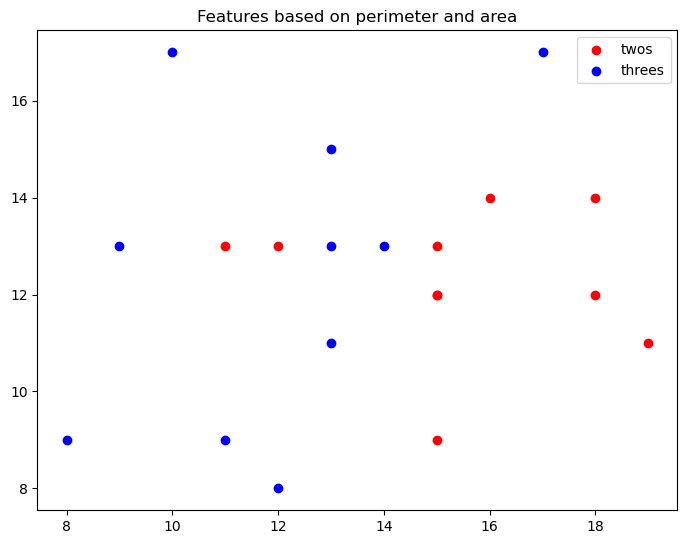

In [98]:
# Projections
twoColSum = [np.sum(two,axis=0) for two in twos]
twoRowSum = [np.sum(two,axis=1) for two in twos]

threeColSum = [np.sum(three,axis=0) for three in threes]
threeRowSum = [np.sum(three,axis=1) for three in threes]

twoMaxCol = np.array([max(col) for col in twoColSum])
threeMaxCol = np.array([max(col) for col in threeColSum])

twoMaxRow = np.array([max(row) for row in twoRowSum])
threeMaxRow = np.array([max(row) for row in threeRowSum])

# Widths
twoWidth = [sum(two>0) for two in twoRowSum]
threeWidth = [sum(three>0) for three in threeRowSum]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twoMaxRow, twoMaxCol, color='r', label='twos')
ax.scatter(threeMaxRow, threeMaxCol, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")


#### Discussion

We choose a fairly simple region method that looks at the row and column with the max amount of region pixels in them. The spread in the X direction, or the max row, we can see some clustering for the different images. This is not true for the Y direction, or the max column. Maybe we could find another feature to combine with the row projection and get better clustering.